### Analysis of Wine dataset:

> - **EDA**
> - **Analytics plan and execution**
> - **Recommendations from analytics model**

In [1]:
### import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [2]:
path = "F:/My startup idea/Study Material/Class 3/"
data = pd.read_csv(path+'wine_dataset.csv', header=0)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
### lets see which variables are categorical and which are numeric
print (data.dtypes)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object


#### Summary of variable types in the dataset:
> - **Style**: Categorical variable
> - **Quality**: Ordinal Categorical variable
> - **All others are numeric variables**

### Check for missing values

In [4]:
from pandas_summary import DataFrameSummary

_ = DataFrameSummary(data)
_.columns_stats

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
counts,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497
uniques,106,187,89,316,214,135,276,998,108,111,111,7,2
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool


> ***Missing Data: There are no missing values in the data ***

In [5]:
#### We will do a lot of plots; lets write a function to automate univariate plots

def univariate_plots(metric,data,rotation=0,size=(16,6),use_weights=False, annotate=True,show_xlabel=False):
    
    if data[metric].dtype == "float":
        print("Variable: {}; Mean: {}; Median: {}".format(metric,round(np.mean(data[metric]),1),round(np.median(data[metric]),1)))

    plt.figure(figsize=size)
    plt.xticks(rotation=rotation)
    #plt.xlabel(metric, fontsize=12)
    
    if use_weights:
        temp_df = data.groupby(metric).agg({'Updated_weight': sum})
        temp_df = temp_df.reset_index()
        ax=sns.barplot(x=metric, y='Updated_weight', data=temp_df)
        ncount = temp_df['Updated_weight'].sum()
        plt.title('Weighted: Overall {} distribution' .format(metric))

    else:
        temp_df=data
        ax=sns.countplot(x=metric, data=data)
        ncount = len(data)
        plt.title('Overall {} distribution' .format(metric))


    ax2=ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax2.set_yticks([])

    ax2.yaxis.set_label_position('left')
    ax.yaxis.set_label_position('right')
    
    #ax2.set_ylabel('Frequency [%]')
    
    if annotate:
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') 
    if not show_xlabel:
        plt.xticks([])
    plt.show()

In [6]:
#### We will do a lot of plots; lets write a function to automate univariate plots

def univariate_violin_plots(metric,data,rotation=0,size=(16,6),use_weights=False, annotate=True,show_xlabel=False):
    
    if data[metric].dtype == "float":
        print("Variable: {}; Mean: {}; Median: {}".format(metric,round(np.mean(data[metric]),1),round(np.median(data[metric]),1)))

    plt.figure(figsize=size)
    plt.xticks(rotation=rotation)
    #plt.xlabel(metric, fontsize=12)
    
    if use_weights:
        temp_df = data.groupby(metric).agg({'Updated_weight': sum})
        temp_df = temp_df.reset_index()
        ax=sns.barplot(x=metric, y='Updated_weight', data=temp_df)
        ncount = temp_df['Updated_weight'].sum()
        plt.title('Weighted: Overall {} distribution' .format(metric))

    else:
        temp_df=data
        ax=sns.violinplot(x=metric, data=data,inner="quartile")
        ncount = len(data)
        plt.title('Overall {} distribution' .format(metric))


    ax2=ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax2.set_yticks([])

    ax2.yaxis.set_label_position('left')
    ax.yaxis.set_label_position('right')
    
    #ax2.set_ylabel('Frequency [%]')
    
    if annotate:
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') 
    if not show_xlabel:
        plt.xticks([])
    plt.show()

Variable: fixed_acidity; Mean: 7.2; Median: 7.0


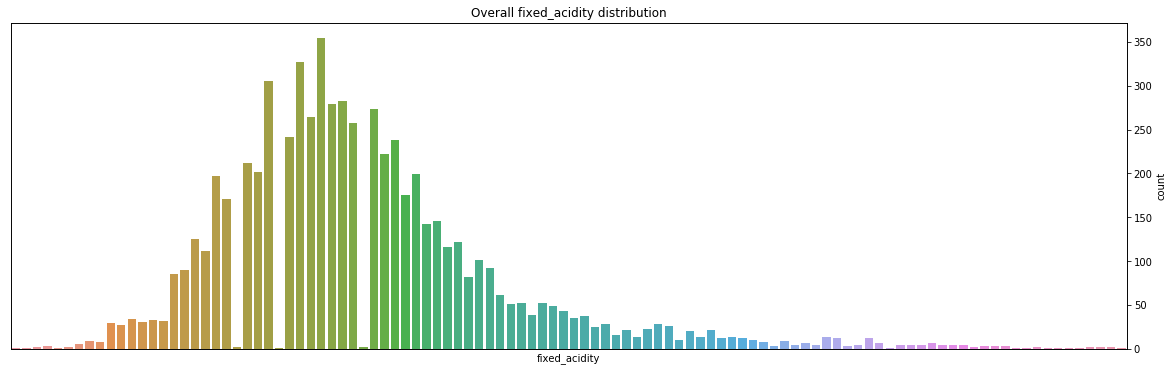

Variable: volatile_acidity; Mean: 0.3; Median: 0.3


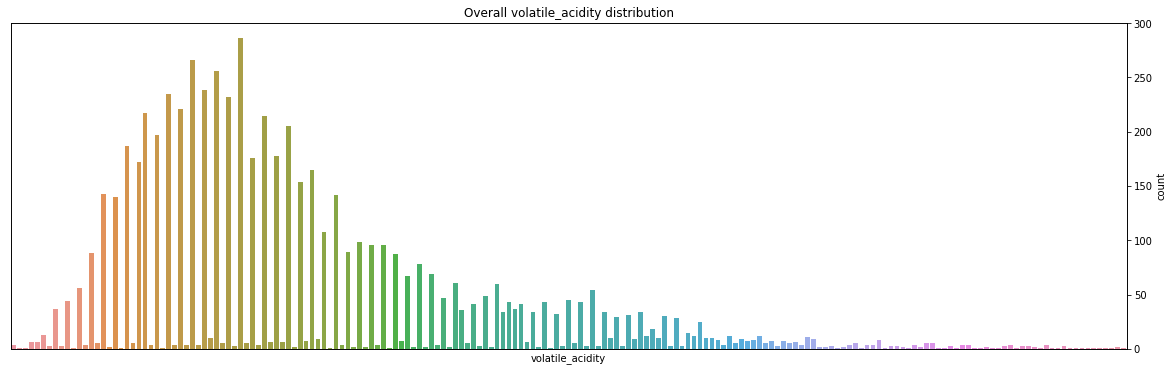

Variable: citric_acid; Mean: 0.3; Median: 0.3


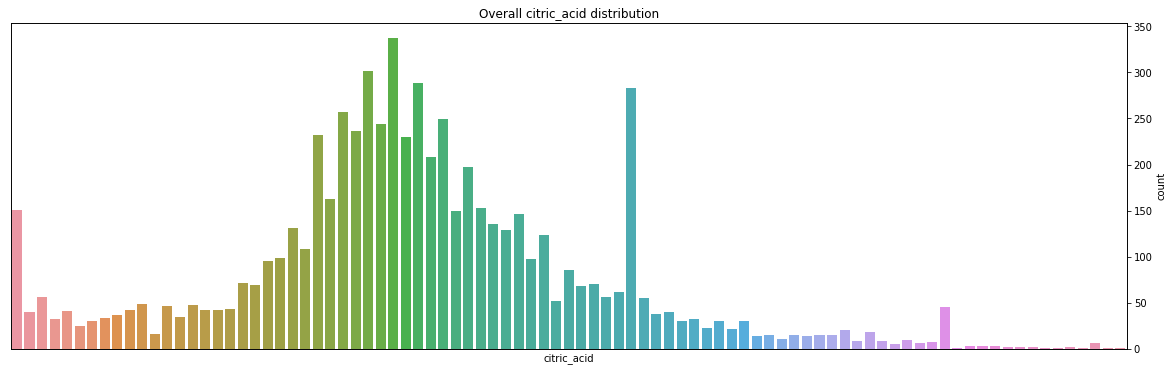

Variable: residual_sugar; Mean: 5.4; Median: 3.0


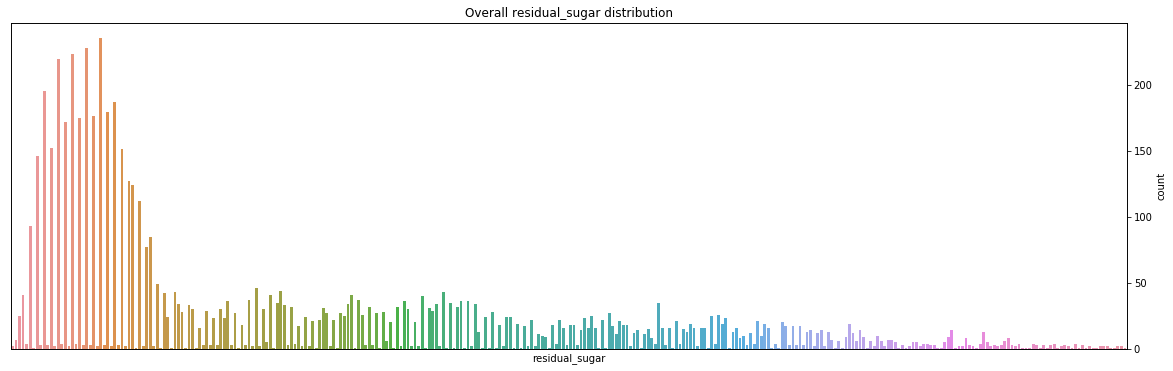

Variable: chlorides; Mean: 0.1; Median: 0.0


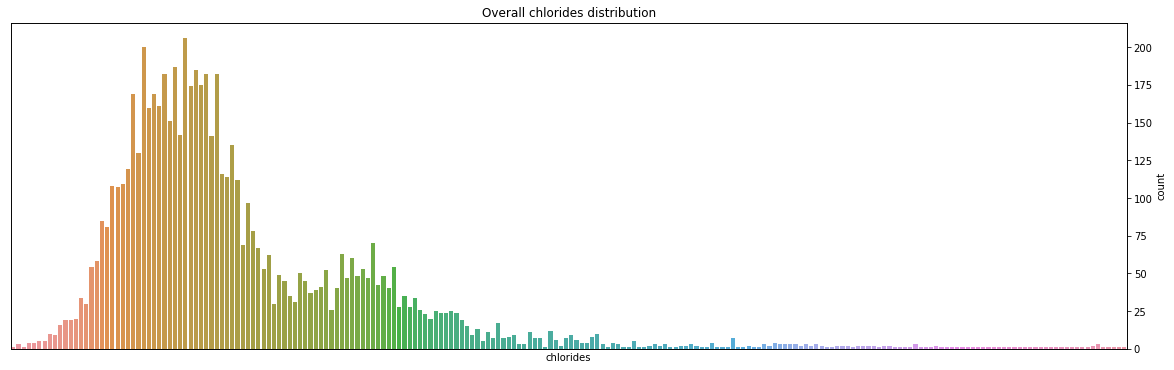

Variable: free_sulfur_dioxide; Mean: 30.5; Median: 29.0


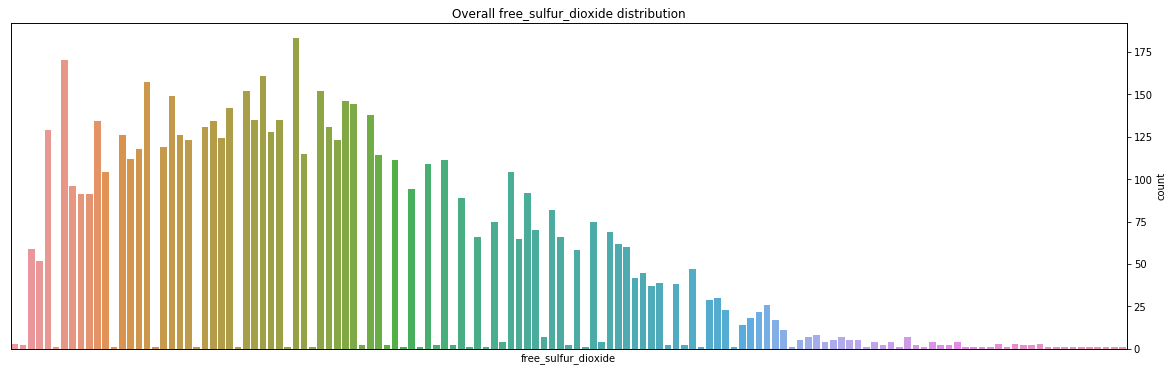

Variable: total_sulfur_dioxide; Mean: 115.7; Median: 118.0


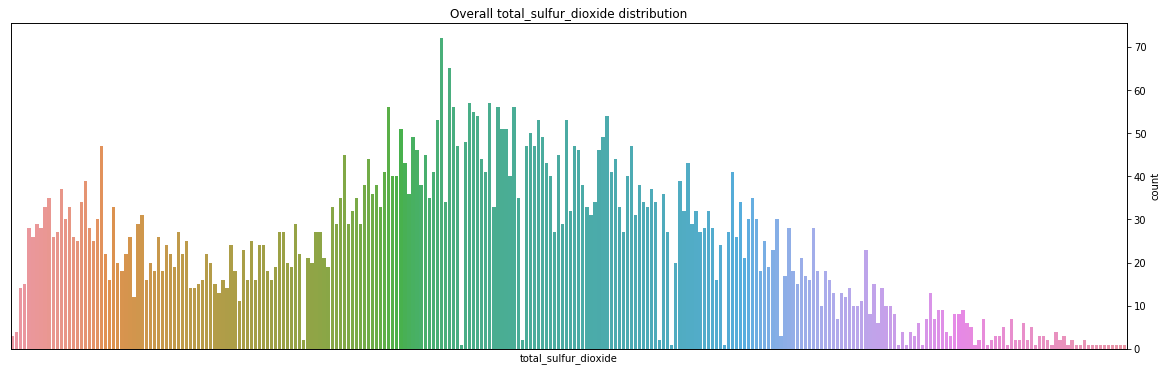

Variable: density; Mean: 1.0; Median: 1.0


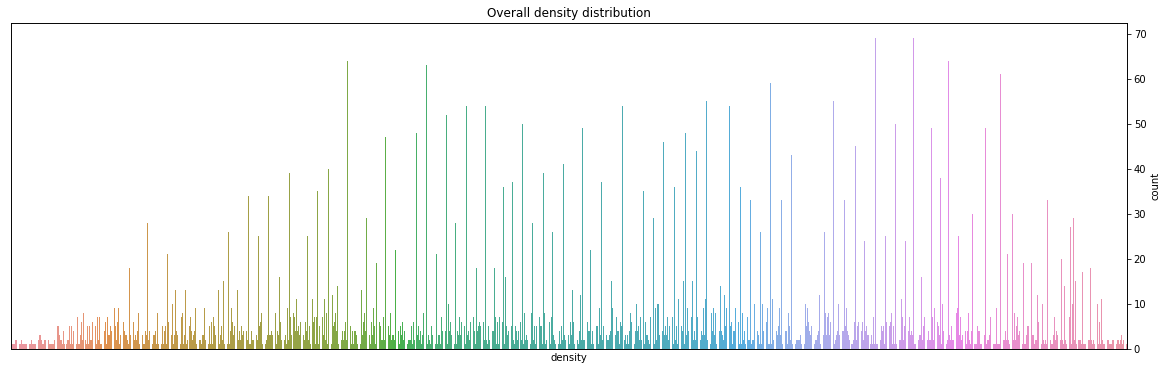

Variable: pH; Mean: 3.2; Median: 3.2


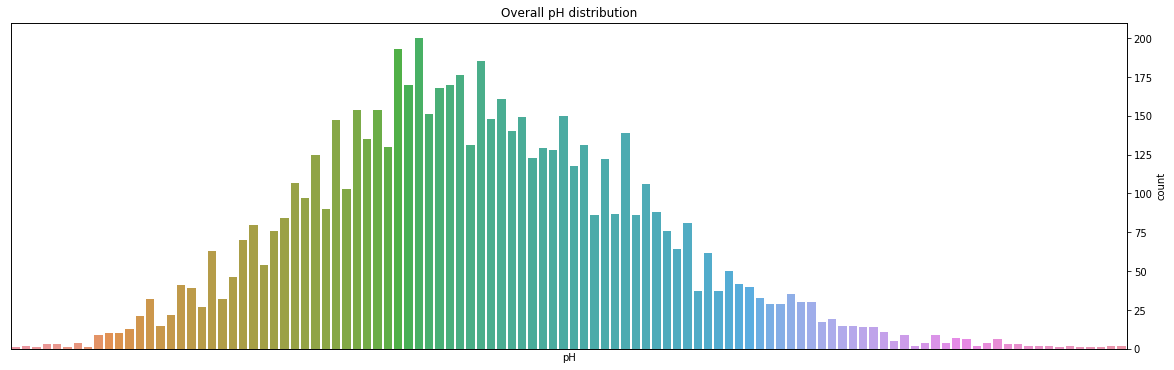

Variable: sulphates; Mean: 0.5; Median: 0.5


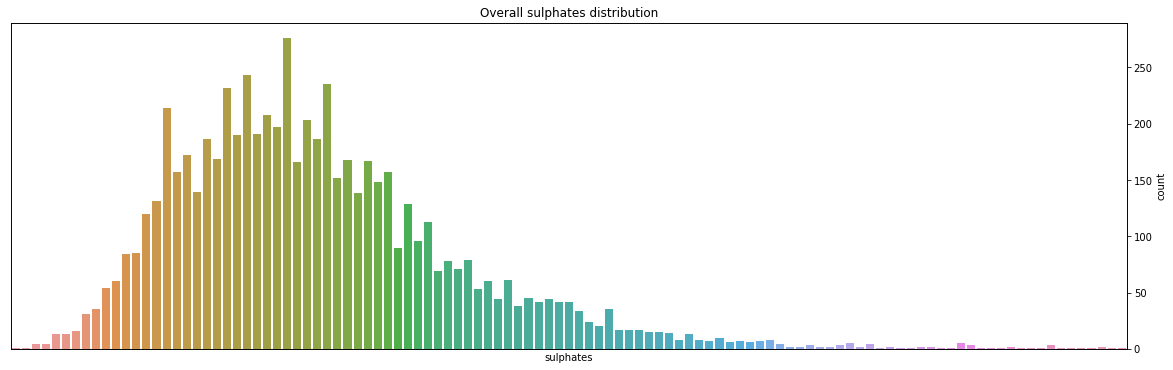

Variable: alcohol; Mean: 10.5; Median: 10.3


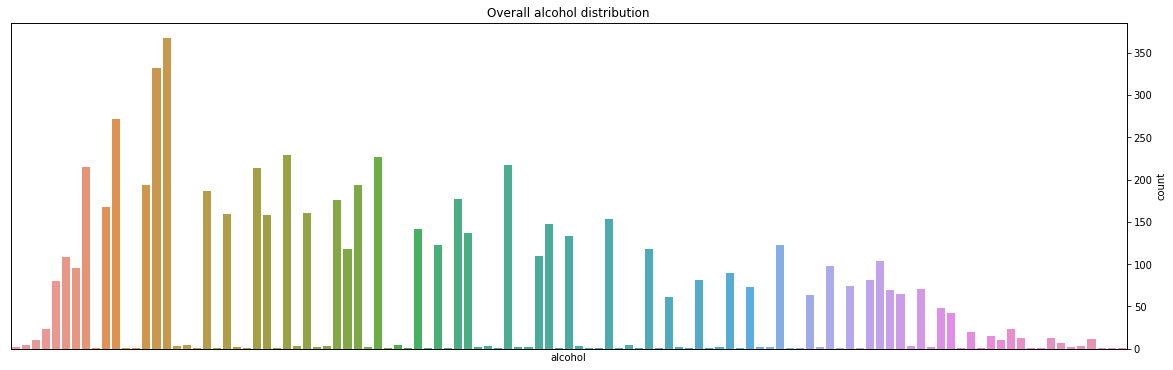

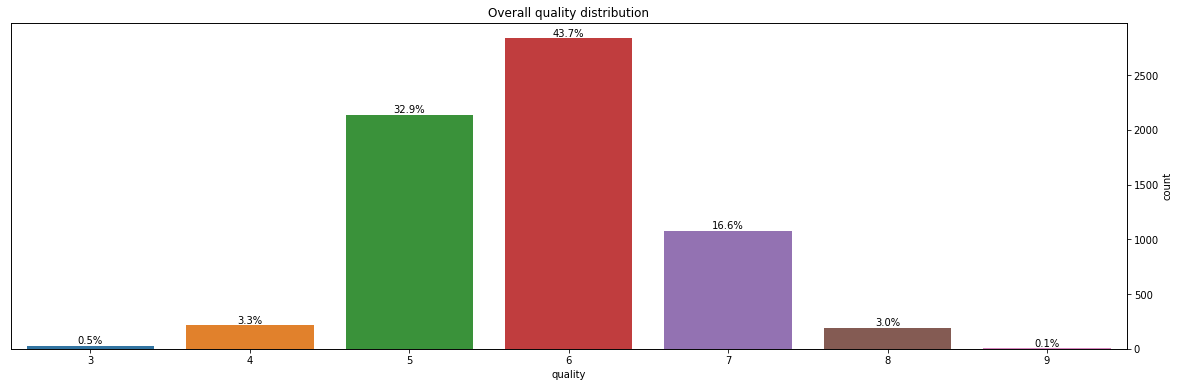

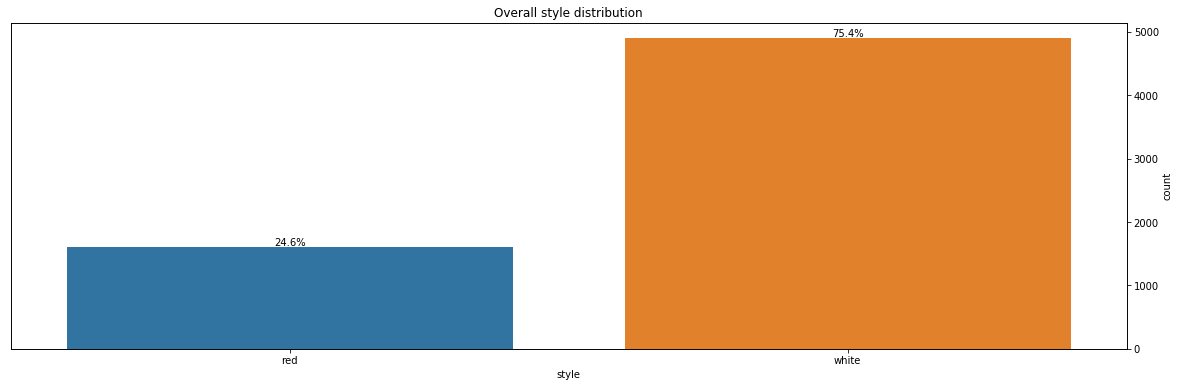

In [7]:
for var in data.columns :
    if data[var].dtype == "float":
        univariate_plots(metric=var,data=data,rotation=0,size=(20,6),use_weights=False, annotate=False,show_xlabel=False)
    else:
        univariate_plots(metric=var,data=data,rotation=0,size=(20,6),use_weights=False, annotate=True,show_xlabel=True)

Variable: fixed_acidity; Mean: 7.2; Median: 7.0


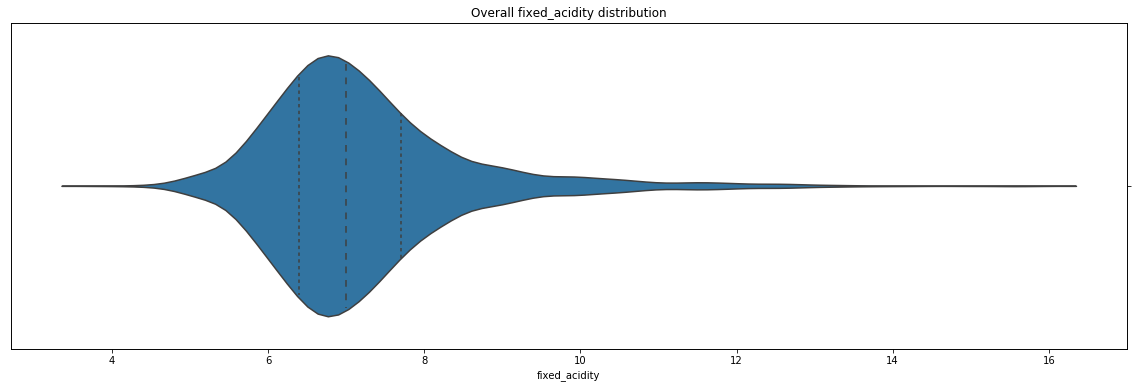

Variable: volatile_acidity; Mean: 0.3; Median: 0.3


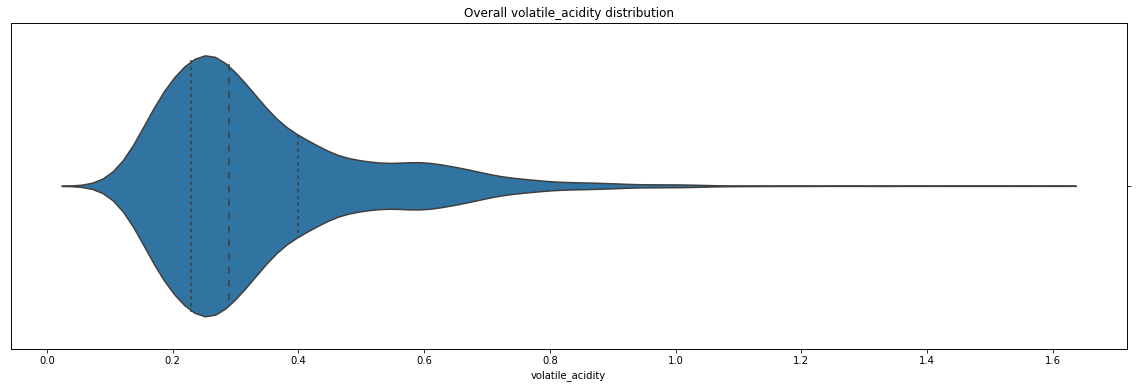

Variable: citric_acid; Mean: 0.3; Median: 0.3


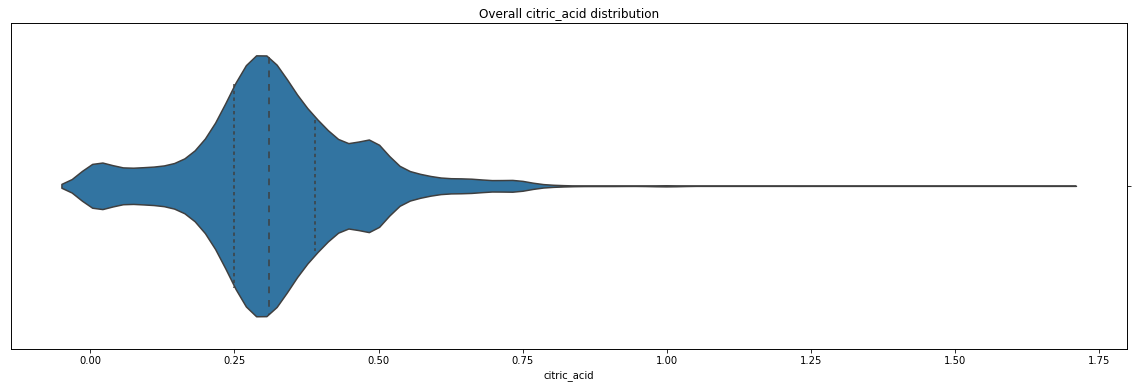

Variable: residual_sugar; Mean: 5.4; Median: 3.0


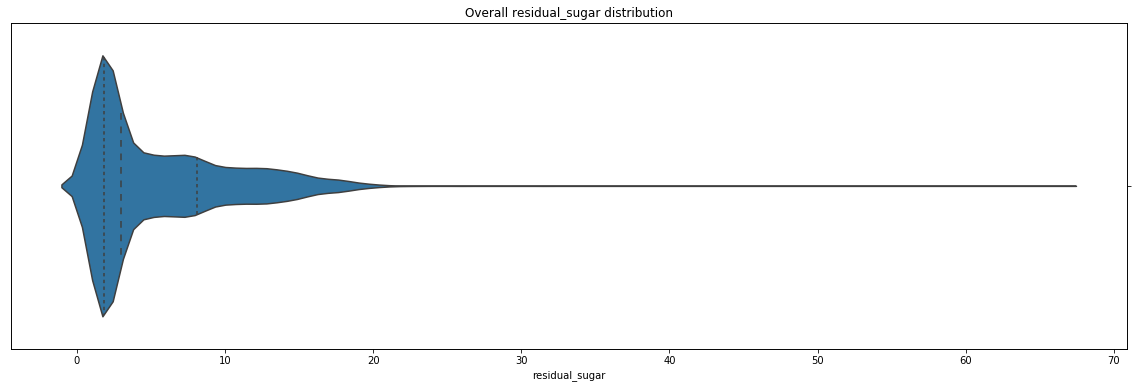

Variable: chlorides; Mean: 0.1; Median: 0.0


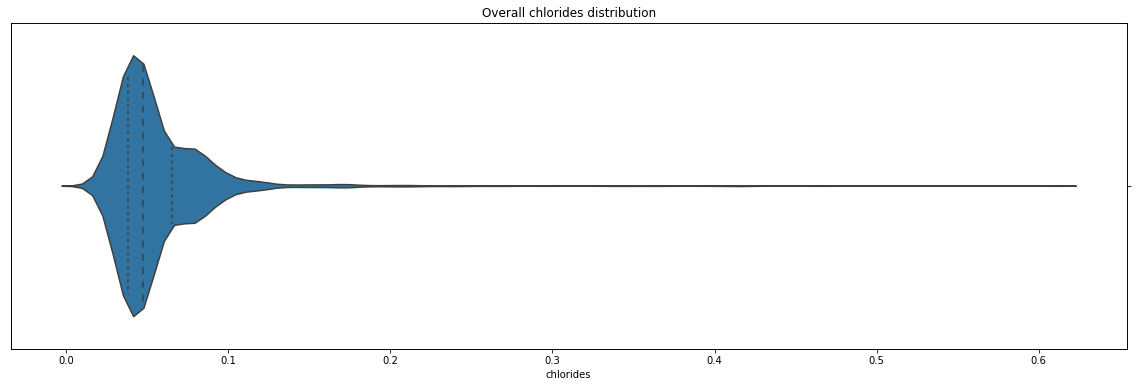

Variable: free_sulfur_dioxide; Mean: 30.5; Median: 29.0


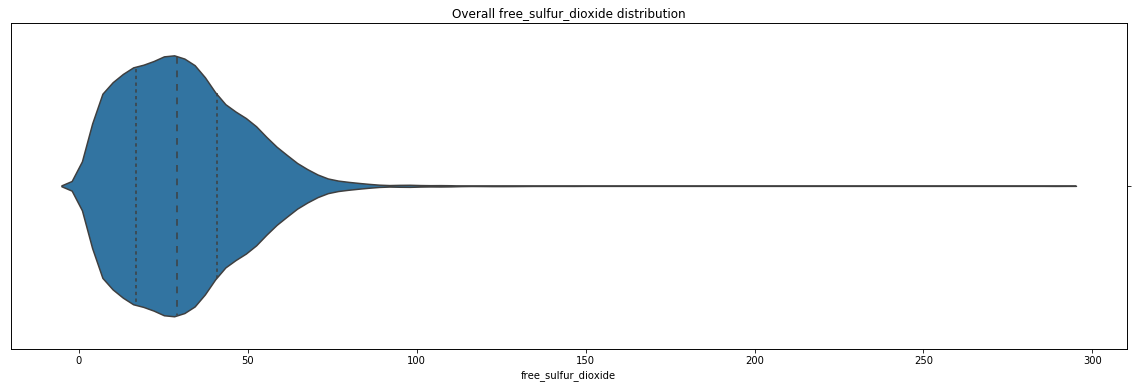

Variable: total_sulfur_dioxide; Mean: 115.7; Median: 118.0


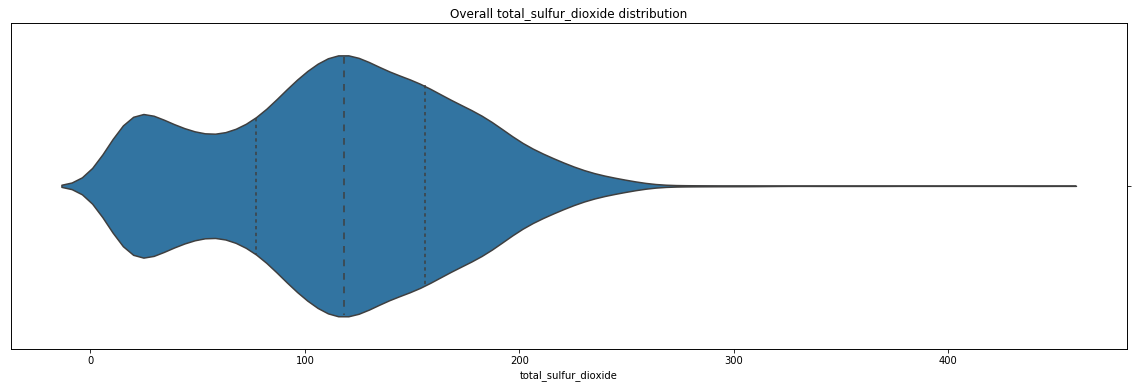

Variable: density; Mean: 1.0; Median: 1.0


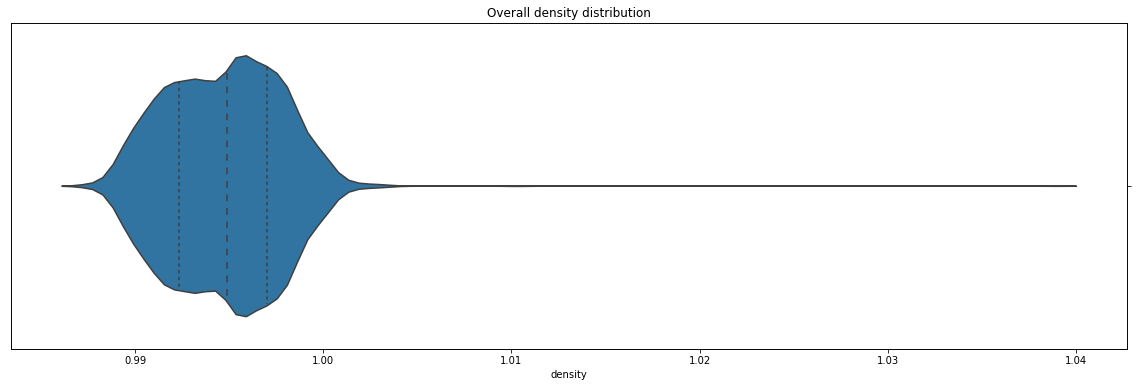

Variable: pH; Mean: 3.2; Median: 3.2


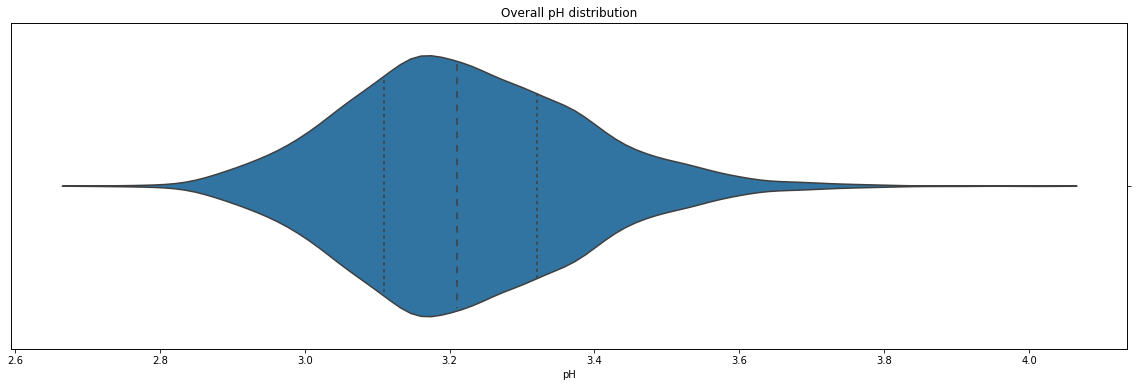

Variable: sulphates; Mean: 0.5; Median: 0.5


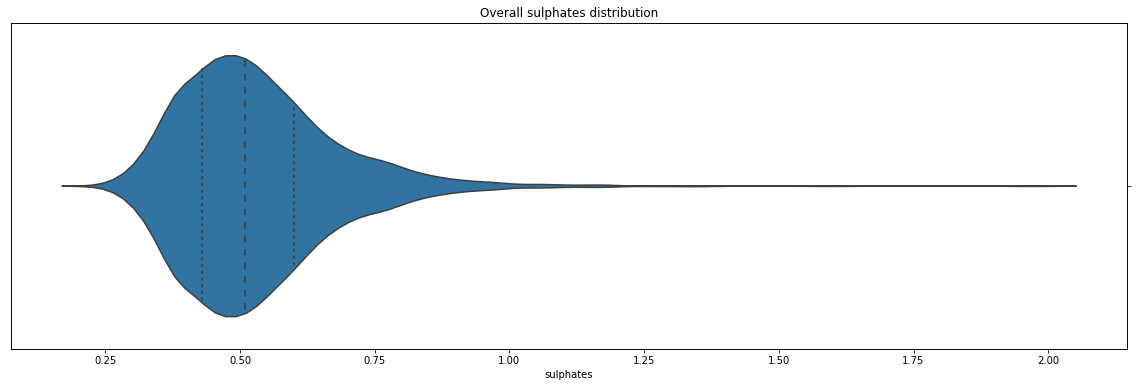

Variable: alcohol; Mean: 10.5; Median: 10.3


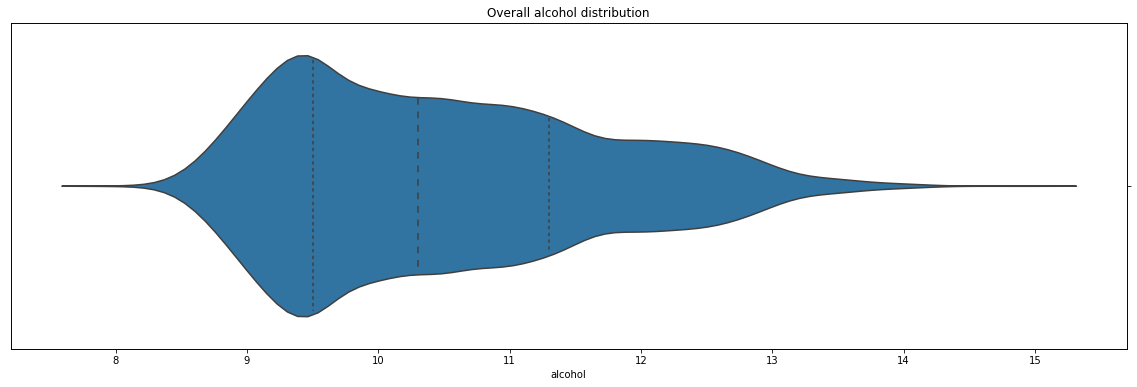

In [8]:
for var in data.columns :
    if data[var].dtype == "float":
        univariate_violin_plots(metric=var,data=data,rotation=0,size=(20,6),use_weights=False, annotate=False,show_xlabel=True)
    else:
        continue

> ***Univariate Analysis Takeaways:***
> -  **Fixed Acidity**:
>> - Mean: 7.2
>> - Median: 7.0
>> - Approximately normal distribution with some intermediate distribution gaps

> -  **Volatile Acidity**:
>> - Mean: 0.3
>> - Median: 0.3
>> - Approximately normal distribution with right-skewness

> -  **Citric Acid**:
>> - Mean: 0.3
>> - Median: 0.3
>> - Approximately normal distribution with some intermediate high count values

> -  **residual_sugar**:
>> - Mean: 5.4
>> - Median: 3.0
>> - Long tailed (right) distribution with multiple gaussians - can be approximated with a single normal distrubution as well with right skewness

> -  **Chlorides**:
>> - Mean: 0.1
>> - Median: 0.0
>> - Atleast 2 gaussians visible but can be approximated using single normal distribution as well with long tail

> -  **free_sulfur_dioxide**:
>> - Mean: 30.5
>> - Median: 29.0
>> - Slightly discrete values, can be approximated with a normal distribution with long tail


> -  **total_sulfur_dioxide**:
>> - Mean: 115.7
>> - Median: 118.0
>> - Atleast 2 gaussians with different mean and std.dev visible

> -  **density**:
>> - Mean: 1.0
>> - Median: 1.0
>> - Approximately uniform distribution

> -  **pH**:
>> - Mean: 3.2
>> - Median: 3.2
>> - Normal distribution 

> -  **sulphates**:
>> - Mean: 0.5
>> - Median: 0.5
>> - Normal distribution with right skewness 

> -  **alcohol**:
>> - Mean: 10.5
>> - Median: 10.3
>> - Frequent values are mostly discretized in nature with a long right-tail distribution 

> -  **Quality**:
>> - Discrete distribution with more tha 90% values in mid quality range (5,6,7) 

> -  **Style**:
>> - Dataset is slightly imbalanced with:
>>> - 75% White Wine
>>> - 25% Red Wine

### Multivariate analysis

>  *** Analysis: Wine quality across wine styles***

Text(0.5,1,'Distribution of wine quality across wine styles')

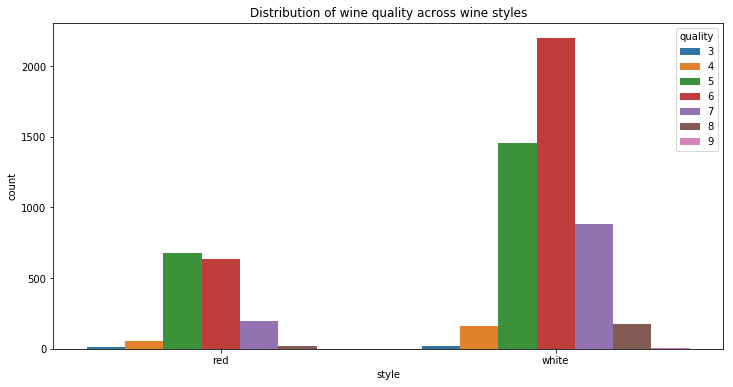

In [9]:
plt.figure(figsize=(12,6))
#plt.xlabel(metric, fontsize=12)
ax = sns.countplot(x="style", hue="quality", data=data)
plt.title('Distribution of wine quality across wine styles')

> - ***Summary of wine quality with respect to wine styles***
>> -  **White wine**: 
>>> - Higher proportion of better quality (quality score of 6 and above) wine
>>> - Normal distribution
>> -  **Red wine**: 
>>> - Compared to White wine, Red wine has lower proportion of better quality (quality score of 6 and above) wine
>>> - Normal distribution with right skew


In [10]:
#### We will do a lot of plots; lets write a function to automate multivariate plots

def multivariate_plots(x_metric,y_metric,data,rotation=0,size=(16,6),use_weights=False, annotate=True,show_xlabel=False):
    
    if data[x_metric].dtype == "float":
        print("Variable: {}; Mean: {}; Median: {}".format(metric,round(np.mean(data[metric]),1),round(np.median(data[metric]),1)))

    plt.figure(figsize=size)
    plt.xticks(rotation=rotation)
    #plt.xlabel(metric, fontsize=12)
    
    if use_weights:
        temp_df = data.groupby(metric).agg({'Updated_weight': sum})
        temp_df = temp_df.reset_index()
        ax=sns.barplot(x=metric, y='Updated_weight', data=temp_df)
        ncount = temp_df['Updated_weight'].sum()
        plt.title('Weighted: Overall {} distribution' .format(metric))

    else:
        temp_df=data
        ax=sns.violinplot(x=data[x_metric],y=data[y_metric], data=data,hue="quality")
        ncount = len(data)
        plt.title('Distribution for {} vs {} ' .format(x_metric,y_metric))


    ax2=ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax2.set_yticks([])

    ax2.yaxis.set_label_position('left')
    ax.yaxis.set_label_position('right')
    
    #ax2.set_ylabel('Frequency [%]')
    
    if annotate:
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') 
    if not show_xlabel:
        plt.xticks([])
    plt.show()

#### Most important metric to analyze is to see how various chemical compositions of wine affects its quality. 

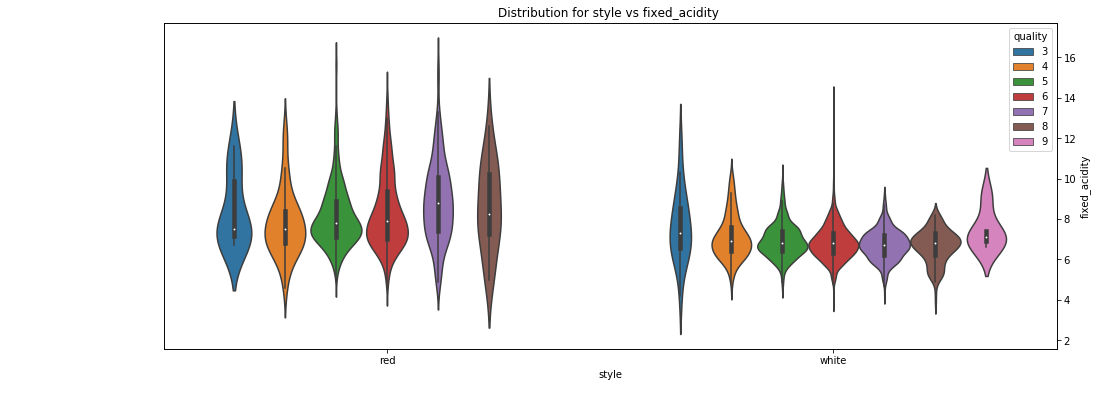

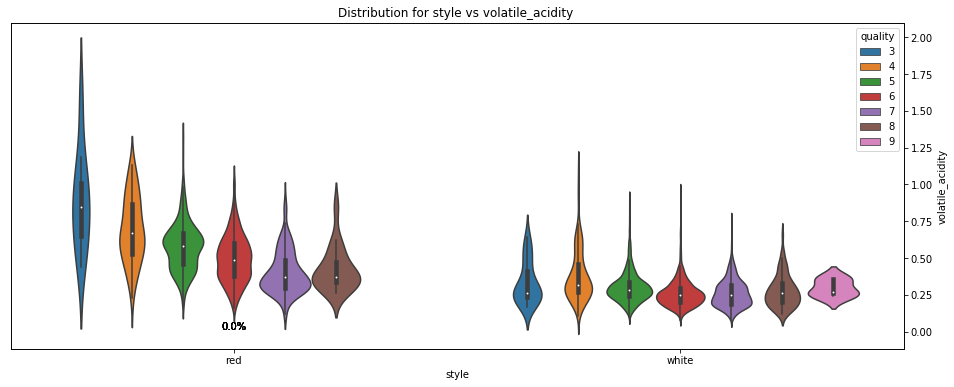

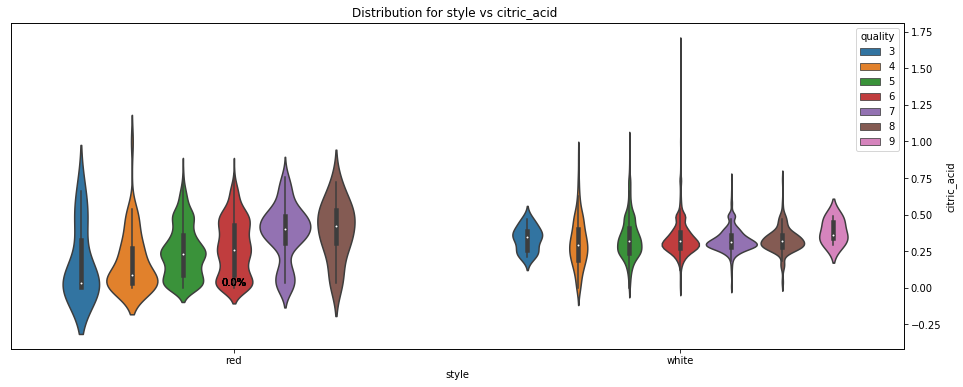

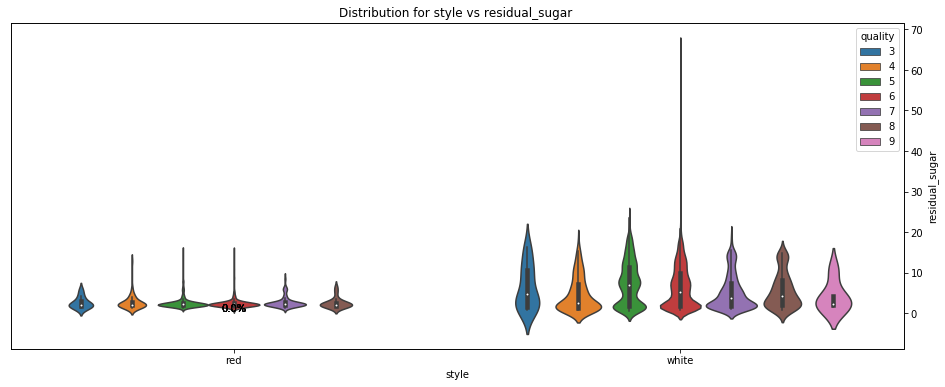

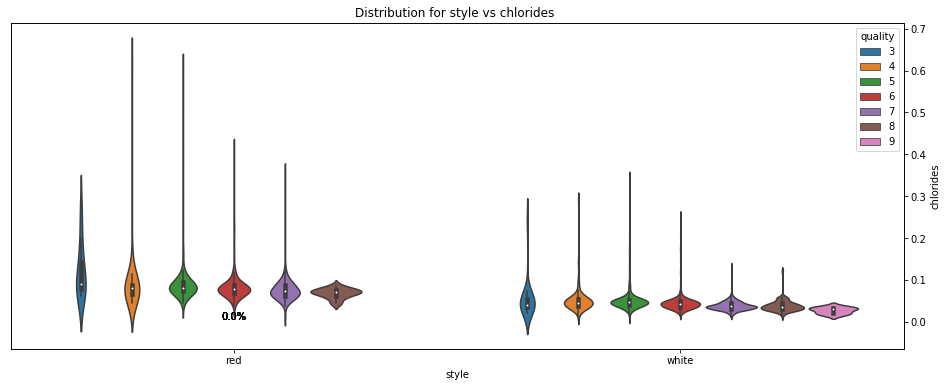

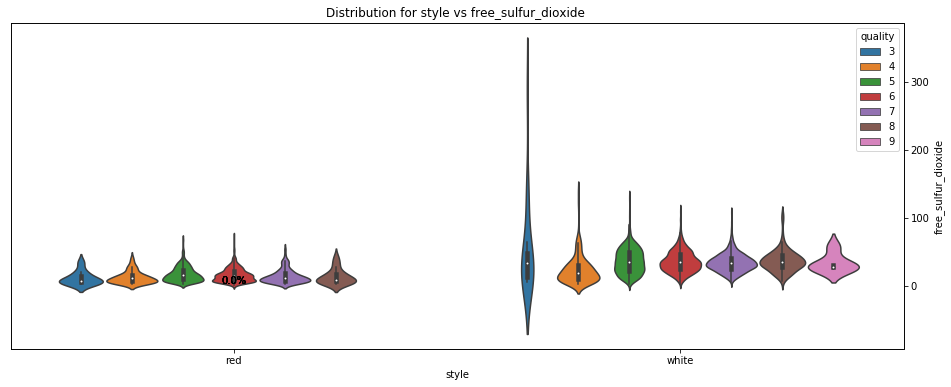

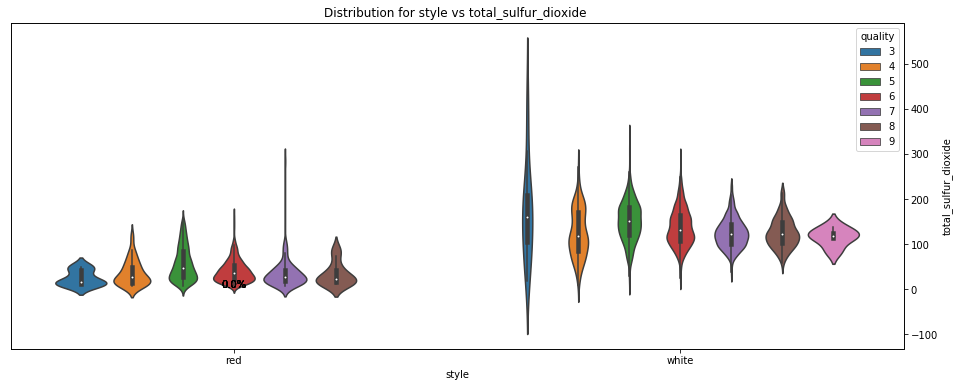

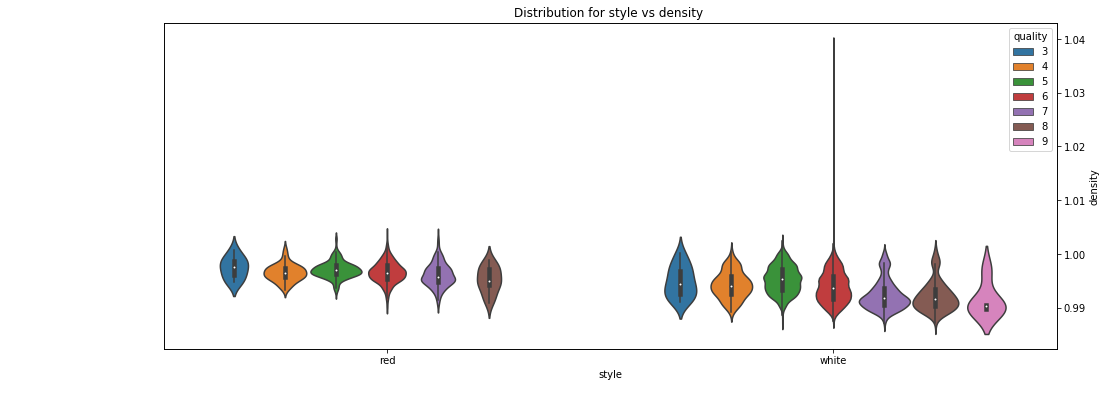

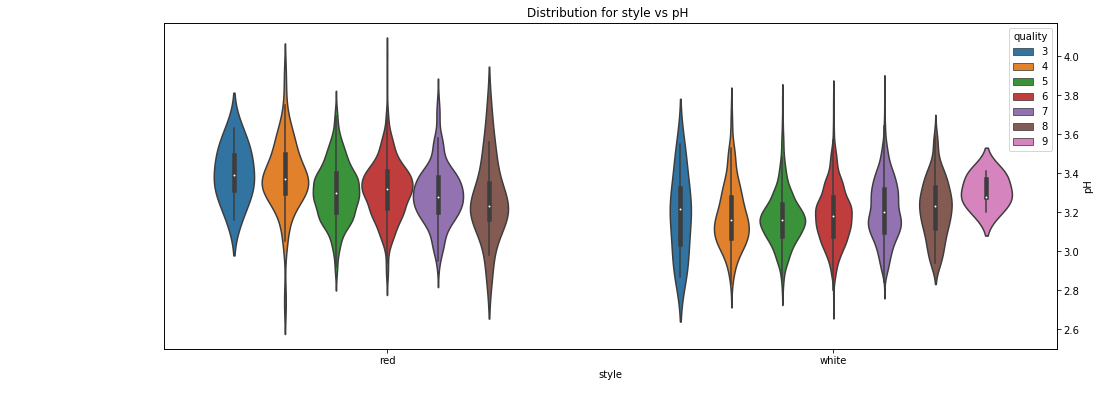

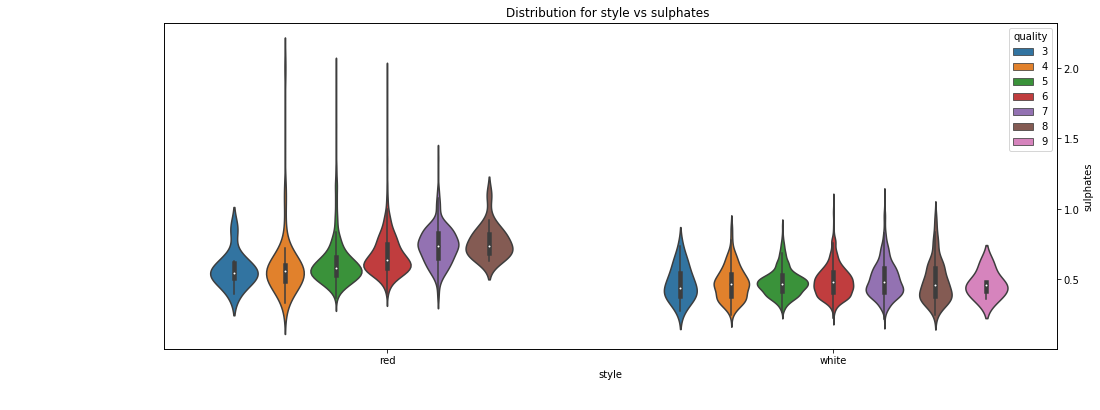

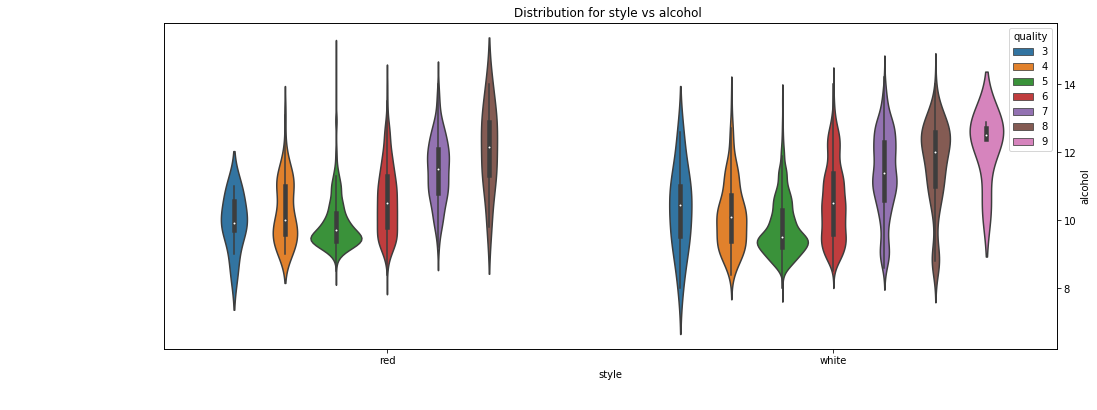

In [11]:
x_metric = 'style'
for var in data.columns :
    if data[var].dtype == "float":
        multivariate_plots(x_metric,var,data,rotation=0,size=(16,6),use_weights=False, annotate=True,show_xlabel=True)
    else:
        continue

> **Red and White wine with different quality scores differ across key chemical characteriests. A brief summary is noted below:**

> - ***Fixed Acidity***:
>> - Within Red wines there is no particular pattern for fixed acidity across quality scores
>> - Within White there is a lot of variation in fixed acidity with higher quality white wines typically having a smaller range for fixed acidity
>> - Across red and wine wines; White wines in general have low fixed acidity content

> - ***Volatility acidity***:
>> - Higher quality Red wines have consistently lower volatile acidity content
>> - Within White wines there is no particular pattern for Volatile acidity across quality scores
>> - Across red and wine wines; White wines in general have low Volatile acidity content

> - ***Citric Acid***:
>> - Higher quality Red wines have consistently higher citric acid content with higher spread of values
>> - Within White wines there is no particular pattern for citic acid across quality scores, however, the operating range is very narrow for White wines

> - ***Residual Sugar***:
>> - Red wines across various quality scores have a very specific operating range for residual sugar
>> - White wines, on the other hand have a much larger spread of values for residual sugar content
>> - Generally, White wines have higher residual sugar content than Red wines

> - ***Chlorides***:
>> - Mid quality Red wines have a much larger spread of values for Chlorides than the highest quality ones
>> - Mid quality White wines have a much larger spread of values for Chlorides than the highest quality ones
>> - Generally, White wines have lower chlorides content than Red wines

> - ***Free Sulphur Dioxide***:
>> - Red wines have a very narrow range for free sulphur dioxide content 
>> - White wines have a slightly larger range for free sulphur dioxide content 
>> - Generally, White wines have higher free sulphur dioxide content than Red wines

> - ***Total Sulphur Dioxide***:
>> - Red wines have a very narrow range for total sulphur dioxide content 
>> - White wines have a slightly larger range for total sulphur dioxide content, however, the better the quality the narrower the range of values taken 
>> - Generally, White wines have higher total sulphur dioxide content than Red wines

> - ***Density***:
>> - For both wines better quality means lower density
>> - Generally, White wines have lower density than Red wines

> - ***pH***:
>> - Better quality Red wines have lower pH values 
>> - Better quality White wines have higher pH values 
>> - Generally, White wines have lower pH value than Red wines

> - ***Sulphates***:
>> - Better quality Red wines have higher sulphate content 
>> - Generally, White wines have lower pH value than Red wines with a narrow distribution of values

> - ***Alcohol***:
>> - For both Red and White wines - Better quality correlates to increased alcohol content


### Defining business case: 

> The most important business case is how to predict the quality of wine given a particular style and other chemical compositions so that business can decide if it will yield market returns. 

### Defining analytics case: 

> Predict the quality of wine given the input X variables (style, acidity, pH etc)

In [12]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

#### First, we need to convert "style" to either a One-hot representation or just encode. We will do One-Hot encoding.

In [13]:
data['White_or_not'] = pd.get_dummies(data['style'],drop_first = True)
data.drop(['style'],inplace=True,axis=1)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,White_or_not
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [14]:
X_variables = [X_var for X_var in data.columns if X_var != 'quality']
Y_variable = ['quality']

print ("Summary of analytics case with X and Y below as below")
print("----------------------------------------------------------------------------------------------------------------------")
print("Dependent variables: {}".format(X_variables))
print("----------------------------------------------------------------------------------------------------------------------")
print("Independent variables: {}".format(Y_variable))

Summary of analytics case with X and Y below as below
----------------------------------------------------------------------------------------------------------------------
Dependent variables: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'White_or_not']
----------------------------------------------------------------------------------------------------------------------
Independent variables: ['quality']


#### We will try 3 different models and comapre results
> - Logistic regression without regularization
> - Lasso/Ridge/Elastic Net Logistic Regression
> - Random Forest without hyper parameter optimization

### Define validation strategy with the following choices:
> - 80:20 stratified split wrt quality
> - 5 fold CV

### We will do 5 fold cv as it is more robust and provides better estimates for metrics

In [15]:
def get_class_data(df,class_label):
    df['Y'] = np.where(df['quality']==class_label, 1, 0)
    return (df)

In [16]:
#### Logistic Regression without regularization
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
Accuracy = []

for classes in data.quality.unique():
    data_upd = get_class_data(data,classes)
    #print(data_upd.head())
    data_upd=data_upd.reset_index()
    X = data_upd[X_variables].values
    y = data_upd['Y'].values.reshape(-1,)
    kf = StratifiedKFold(n_splits=5)
    kf.get_n_splits(X,y)
    k = 1

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        log_reg = linear_model.LogisticRegression(C=1, penalty='l2', tol=0.001,multi_class='ovr',max_iter = 1000)
        log_reg.fit(X_train,y_train)
        preds = log_reg.predict(X_test)
        acc = accuracy_score(y_test,preds)
        Accuracy.append({'curr_class':classes,'accuracy':acc})
        print("Accuracy for class:{}; fold: {} is {}".format(classes,k,acc))
        k += 1

Accuracy for class:5; fold: 1 is 0.4715384615384615
Accuracy for class:5; fold: 2 is 0.6261538461538462
Accuracy for class:5; fold: 3 is 0.6884615384615385
Accuracy for class:5; fold: 4 is 0.729022324865281
Accuracy for class:5; fold: 5 is 0.697226502311248
Accuracy for class:6; fold: 1 is 0.5649500384319754
Accuracy for class:6; fold: 2 is 0.5427251732101617
Accuracy for class:6; fold: 3 is 0.5619707467282525
Accuracy for class:6; fold: 4 is 0.5704387990762124
Accuracy for class:6; fold: 5 is 0.5804464973056197
Accuracy for class:7; fold: 1 is 0.8338461538461538
Accuracy for class:7; fold: 2 is 0.83
Accuracy for class:7; fold: 3 is 0.8307692307692308
Accuracy for class:7; fold: 4 is 0.8290993071593533
Accuracy for class:7; fold: 5 is 0.8235747303543913
Accuracy for class:4; fold: 1 is 0.9638739431206764
Accuracy for class:4; fold: 2 is 0.9668976135488837
Accuracy for class:4; fold: 3 is 0.9668976135488837
Accuracy for class:4; fold: 4 is 0.9668976135488837
Accuracy for class:4; fold: 

In [17]:
Acc_df = []
for classes in data.quality.unique():
    Acc_df.append({'Wine_Quality':classes,'Accuracy':np.mean([d['accuracy'] for d in Accuracy if d['curr_class'] == classes])*100,"Model":'Logistic Regression without regularization'})
    print ("Mean accuracy across folds for class {} is {}%".format(classes
            ,np.mean([d['accuracy'] for d in Accuracy if d['curr_class'] == classes])*100))

Mean accuracy across folds for class 5 is 64.24805346660752%
Mean accuracy across folds for class 6 is 56.410625095044445%
Mean accuracy across folds for class 7 is 82.94578844258258%
Mean accuracy across folds for class 4 is 96.62928794632423%
Mean accuracy across folds for class 8 is 97.02941838631351%
Mean accuracy across folds for class 3 is 99.5382483567241%
Mean accuracy across folds for class 9 is 99.92304139278735%


In [18]:
#### Regularized regression with l2 penalty

from sklearn import linear_model
Accuracy = []

for classes in data.quality.unique():
    data_upd = get_class_data(data,classes)
    data_upd=data_upd.reset_index()
    X = data_upd[X_variables].values
    y = data_upd['Y'].values.reshape(-1,)
    kf = StratifiedKFold(n_splits=5)
    kf.get_n_splits(X,y)
    k = 1

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        log_reg = linear_model.LogisticRegression(C=0.001, penalty='l2', tol=0.001,multi_class='ovr',max_iter = 1000)
        log_reg.fit(X_train,y_train)
        preds = log_reg.predict(X_test)
        acc = accuracy_score(y_test,preds)
        Accuracy.append({'curr_class':classes,'accuracy':acc})
        print("Accuracy for class:{}; fold: {} is {}".format(classes,k,acc))
        k+= 1

Accuracy for class:5; fold: 1 is 0.6646153846153846
Accuracy for class:5; fold: 2 is 0.5961538461538461
Accuracy for class:5; fold: 3 is 0.65
Accuracy for class:5; fold: 4 is 0.6766743648960739
Accuracy for class:5; fold: 5 is 0.672573189522342
Accuracy for class:6; fold: 1 is 0.5641813989239047
Accuracy for class:6; fold: 2 is 0.5350269438029254
Accuracy for class:6; fold: 3 is 0.5627405696689761
Accuracy for class:6; fold: 4 is 0.5519630484988453
Accuracy for class:6; fold: 5 is 0.5665896843725943
Accuracy for class:7; fold: 1 is 0.8338461538461538
Accuracy for class:7; fold: 2 is 0.8338461538461538
Accuracy for class:7; fold: 3 is 0.8338461538461538
Accuracy for class:7; fold: 4 is 0.8337182448036952
Accuracy for class:7; fold: 5 is 0.8343605546995377
Accuracy for class:4; fold: 1 is 0.9661798616448886
Accuracy for class:4; fold: 2 is 0.9668976135488837
Accuracy for class:4; fold: 3 is 0.9668976135488837
Accuracy for class:4; fold: 4 is 0.9668976135488837
Accuracy for class:4; fold:

In [19]:
for classes in data.quality.unique():
    Acc_df.append({'Wine_Quality':classes,'Accuracy':np.mean([d['accuracy'] for d in Accuracy if d['curr_class'] == classes])*100,"Model":'Logistic Regression with L2 regularization'})
    print ("Mean accuracy across folds for regularized regression for class {} is {}%".format(classes
            ,np.mean([d['accuracy'] for d in Accuracy if d['curr_class'] == classes])*100))

Mean accuracy across folds for regularized regression for class 5 is 65.20033570375293%
Mean accuracy across folds for regularized regression for class 6 is 55.61003290534491%
Mean accuracy across folds for regularized regression for class 7 is 83.3923452208339%
Mean accuracy across folds for regularized regression for class 4 is 96.67540631680846%
Mean accuracy across folds for regularized regression for class 8 is 97.02941838631351%
Mean accuracy across folds for regularized regression for class 3 is 99.5382483567241%
Mean accuracy across folds for regularized regression for class 9 is 99.92304139278735%


In [20]:
#### Random Forest
from sklearn.ensemble import RandomForestClassifier
Accuracy = []

for classes in data.quality.unique():
    data_upd = get_class_data(data,classes)
    data_upd=data_upd.reset_index()
    X = data_upd[X_variables].values
    y = data_upd['Y'].values.reshape(-1,)
    kf = StratifiedKFold(n_splits=5)
    kf.get_n_splits(X,y)
    k = 1

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = RandomForestClassifier()
        clf.fit(X_train,y_train)
        preds = clf.predict(X_test)
        acc = accuracy_score(y_test,preds)
        Accuracy.append({'curr_class':classes,'accuracy':acc})
        print("Accuracy for class:{}; fold: {} is {}".format(classes,k,acc))
        k+= 1

Accuracy for class:5; fold: 1 is 0.4530769230769231
Accuracy for class:5; fold: 2 is 0.6323076923076923
Accuracy for class:5; fold: 3 is 0.683076923076923
Accuracy for class:5; fold: 4 is 0.7244033872209392
Accuracy for class:5; fold: 5 is 0.7280431432973806
Accuracy for class:6; fold: 1 is 0.5664873174481169
Accuracy for class:6; fold: 2 is 0.5334872979214781
Accuracy for class:6; fold: 3 is 0.5596612779060816
Accuracy for class:6; fold: 4 is 0.5866050808314087
Accuracy for class:6; fold: 5 is 0.5765973826020016
Accuracy for class:7; fold: 1 is 0.8376923076923077
Accuracy for class:7; fold: 2 is 0.8307692307692308
Accuracy for class:7; fold: 3 is 0.8323076923076923
Accuracy for class:7; fold: 4 is 0.8052347959969207
Accuracy for class:7; fold: 5 is 0.8058551617873652
Accuracy for class:4; fold: 1 is 0.9638739431206764
Accuracy for class:4; fold: 2 is 0.968437259430331
Accuracy for class:4; fold: 3 is 0.9645881447267128
Accuracy for class:4; fold: 4 is 0.9615088529638183
Accuracy for c

In [21]:
for classes in data.quality.unique():
    Acc_df.append({'Wine_Quality':classes,'Accuracy':np.mean([d['accuracy'] for d in Accuracy if d['curr_class'] == classes])*100,"Model":'RandomForest'})
    print ("Mean accuracy across folds for random forest for class {} is {}%".format(classes
            ,np.mean([d['accuracy'] for d in Accuracy if d['curr_class'] == classes])*100))

Mean accuracy across folds for random forest for class 5 is 64.41816137959717%
Mean accuracy across folds for random forest for class 6 is 56.45676713418173%
Mean accuracy across folds for random forest for class 7 is 82.23718377107033%
Mean accuracy across folds for random forest for class 4 is 96.47532335817951%
Mean accuracy across folds for random forest for class 8 is 96.85998615103402%
Mean accuracy across folds for random forest for class 3 is 99.53826020015397%
Mean accuracy across folds for random forest for class 9 is 99.92304139278735%


Text(0.5,1,'Model performance comparison across Wine Quality Classes')

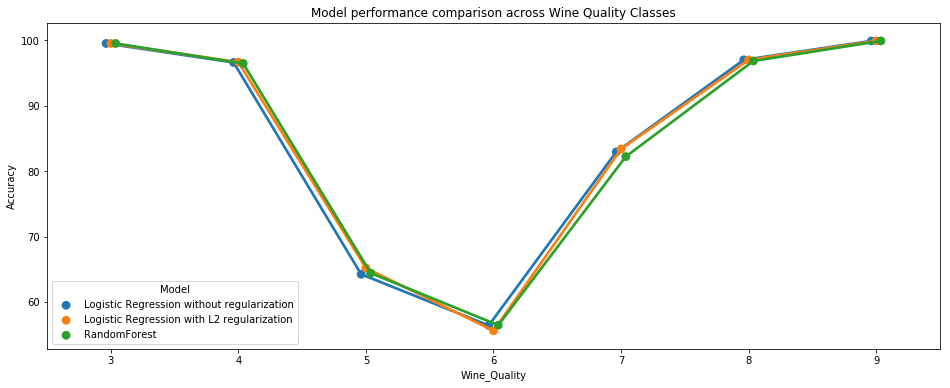

In [22]:
plt.figure(figsize=(16,6))
sns.pointplot(x="Wine_Quality",y="Accuracy",data=pd.DataFrame(Acc_df),hue="Model",dodge=True)
plt.title("Model performance comparison across Wine Quality Classes")

#### Model Performance Conclusion:

> - **Untuned RandomForest** outperforms both regularized and non-regularized Logistic regression in Accuracy terms across most wine quality class
> - -------------------------------------------------------------------------------------------------------------------------------------------------- 
> - ***Best Models by Wine Quality:***
>> - ***For Wine Quality: 3,4,5,9: RandomForest performs best***
>> - ***For Wine Quality: 6: Logistic regressio without regularization performs best***
>> - *** For Wine Quality: 7,8: Regularied Logistic Regression performs best***    

### Probable next steps:
> - Feature engineering to capture additional variation in data
> - Address class imbalance in some wine quality
> - Tune regularizer parameter for logistic regression
> - Tune Random Forest parameters using grid search

### End of Analysis ###